# Defining the Problem Statement

1. Problem Statement:  
Earthquakes cause significant damage to buildings, leading to economic losses, injuries, and loss of lives. Predicting the potential damage to buildings based on structural attributes and geographic location can help in disaster preparedness, risk mitigation, and improving building standards.

2. Business Objective:  
The goal is to develop a predictive model that can accurately classify buildings into different damage levels (low, medium, high) based on structural and geographic data. This will help stakeholders such as governments, urban planners, construction companies, and insurance firms make informed decisions.

3. Problem Description:  
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage

      1: represents low damage  
      2: represents a medium amount of damage  
      3: represents almost complete destruction  

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from ydata_profiling import ProfileReport
from sklearn.compose import ColumnTransformer #allows you to apply different preprocessing steps to different columns of a dataset.
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Load the Data

In [2]:
# Load the CSV files
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

# Merge data on building_id
data = train_values.merge(train_labels, on="building_id")

# Basic Checks

In [4]:
data.shape

(260601, 40)

In [7]:
# Data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

**There are no missing values**

In [9]:
# print first 5 rows
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [10]:
#print last 5 rows
data.tail()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
260596                        0                          0   
260597                        0                          0   
260598                        0                          0   
260599                        0                          0   
260600                        0                          0   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                              0                             0   
260597                              0                             0   
260598                              0                             0   
260599                              0                             0   
260600                              0                             0   

        has_secondary_use_use_police  has_secondary_use_other  damage_grade  
260596                             0                        0             2  
260597                             0                        0             3  
260598                             0                        0             3  
260599                             0                        0             2  
260600                             0                        0             3  

[5 rows x 40 columns]

In [11]:
#print all columns
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [12]:
#check datatype of each columns
data.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

We have:   
22 Binary Features  
8 Numeric Features (6 continuous 2 discrete)  
8 Categorical Features  
1 Target Variable

In [14]:
# unique values in damage_grade
data.damage_grade.unique()

array([3, 2, 1], dtype=int64)

In [15]:
# find count of damage_grade
data.damage_grade.value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

In [5]:
# Feature Selection (Removing building_id)
data.drop(columns=["building_id"], inplace=True)

In [10]:
data.describe().T

count         mean          std  \
geo_level_1_id                          260601.0    13.900353     8.033617   
geo_level_2_id                          260601.0   701.074685   412.710734   
geo_level_3_id                          260601.0  6257.876148  3646.369645   
count_floors_pre_eq                     260601.0     2.129723     0.727665   
age                                     260601.0    26.535029    73.565937   
area_percentage                         260601.0     8.018051     4.392231   
height_percentage                       260601.0     5.434365     1.918418   
has_superstructure_adobe_mud            260601.0     0.088645     0.284231   
has_superstructure_mud_mortar_stone     260601.0     0.761935     0.425900   
has_superstructure_stone_flag           260601.0     0.034332     0.182081   
has_superstructure_cement_mortar_stone  260601.0     0.018235     0.133800   
has_superstructure_mud_mortar_brick     260601.0     0.068154     0.252010   
has_superstructure_cement_mortar_brick  260601.0     0.075268     0.263824   
has_superstructure_timber               260601.0     0.254988     0.435855   
has_superstructure_bamboo               260601.0     0.085011     0.278899   
has_superstructure_rc_non_engineered    260601.0     0.042590     0.201931   
has_superstructure_rc_engineered        260601.0     0.015859     0.124932   
has_superstructure_other                260601.0     0.014985     0.121491   
count_families                          260601.0     0.983949     0.418389   
has_secondary_use                       260601.0     0.111880     0.315219   
has_secondary_use_agriculture           260601.0     0.064378     0.245426   
has_secondary_use_hotel                 260601.0     0.033626     0.180265   
has_secondary_use_rental                260601.0     0.008101     0.089638   
has_secondary_use_institution           260601.0     0.000940     0.030647   
has_secondary_use_school                260601.0     0.000361     0.018989   
has_secondary_use_industry              260601.0     0.001071     0.032703   
has_secondary_use_health_post           260601.0     0.000188     0.013711   
has_secondary_use_gov_office            260601.0     0.000146     0.012075   
has_secondary_use_use_police            260601.0     0.000088     0.009394   
has_secondary_use_other                 260601.0     0.005119     0.071364   
damage_grade                            260601.0     2.238272     0.611814   

                                        min     25%     50%     75%      max  
geo_level_1_id                          0.0     7.0    12.0    21.0     30.0  
geo_level_2_id                          0.0   350.0   702.0  1050.0   1427.0  
geo_level_3_id                          0.0  3073.0  6270.0  9412.0  12567.0  
count_floors_pre_eq                     1.0     2.0     2.0     2.0      9.0  
age                                     0.0    10.0    15.0    30.0    995.0  
area_percentage                         1.0     5.0     7.0     9.0    100.0  
height_percentage                       2.0     4.0     5.0     6.0     32.0  
has_superstructure_adobe_mud            0.0     0.0     0.0     0.0      1.0  
has_superstructure_mud_mortar_stone     0.0     1.0     1.0     1.0      1.0  
has_superstructure_stone_flag           0.0     0.0     0.0     0.0      1.0  
has_superstructure_cement_mortar_stone  0.0     0.0     0.0     0.0      1.0  
has_superstructure_mud_mortar_brick     0.0     0.0     0.0     0.0      1.0  
has_superstructure_cement_mortar_brick  0.0     0.0     0.0     0.0      1.0  
has_superstructure_timber               0.0     0.0     0.0     1.0      1.0  
has_superstructure_bamboo               0.0     0.0     0.0     0.0      1.0  
has_superstructure_rc_non_engineered    0.0     0.0     0.0     0.0      1.0  
has_superstructure_rc_engineered        0.0     0.0     0.0     0.0      1.0  
has_superstructure_other                0.0     0.0     0.0     0.0      1.0  
count_families                          0.0  

# Domain analysis

1. geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region(level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.   
2. count_floors_pre_eq (type: int): number of floors in the building before the earthquake.   
3. age (type: int): age of the building in years.   
4. area_percentage (type: int): normalized area of the building footprint.   
5. height_percentage (type: int): normalized height of the building footprint.
6. land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.   
7. foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.   
8. roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.   
9. ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.   
10. other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.   
11. position (type: categorical): position of the building. Possible values: j, o, s, t.   
12. plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.   
13. has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.   
14. has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.   
15. has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.   
16. has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.   
17. has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.   
18. has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.   
19. has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.   
20. has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.   
21. has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.   
22. has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.   
23. has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.   
24. legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.   
25. count_families (type: int): number of families that live in the building.  
26. has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.   
27. has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.   
28. has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.   
29. has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.   
30. has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.   
31. has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.   
32. has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.   
33. has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.   
34. has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.   
35. has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.   
36. has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.   


# EDA

In [22]:
data.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

## Distibution of Target Variable(damage_grade)

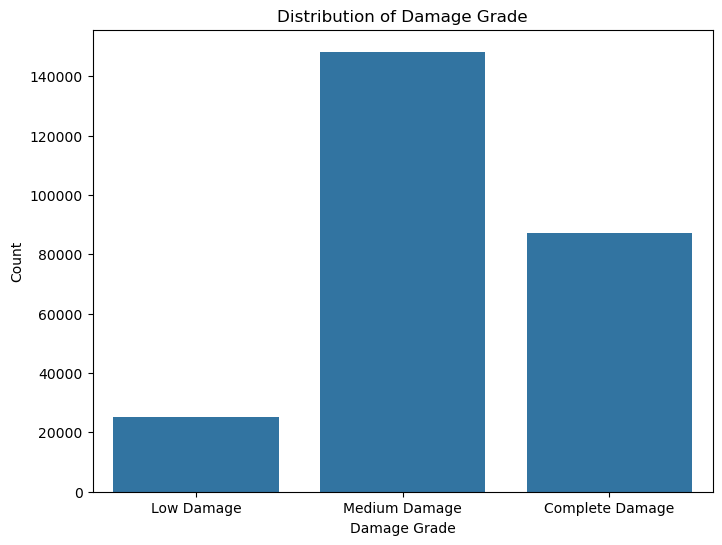

In [10]:
import warnings
warnings.filterwarnings("ignore")
# Mapping damage_grade values to labels
damage_labels = {1: "Low Damage", 2: "Medium Damage", 3: "Complete Damage"}

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='damage_grade', data=data)

# Renaming x-axis labels
ax.set_xticklabels([damage_labels[label] for label in sorted(data['damage_grade'].unique())])

plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()


**Observation**:   
The plot shows that most buildings experienced **medium damage**, followed by **complete damage**, while **low damage** cases are the least frequent.

## Profile Report

In [27]:
profile=ProfileReport(data,title="EDA",explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observation**: There are **8 numeric columns.** Hence first we perform EDA on those columns

## Data Visualization of Numeric Features

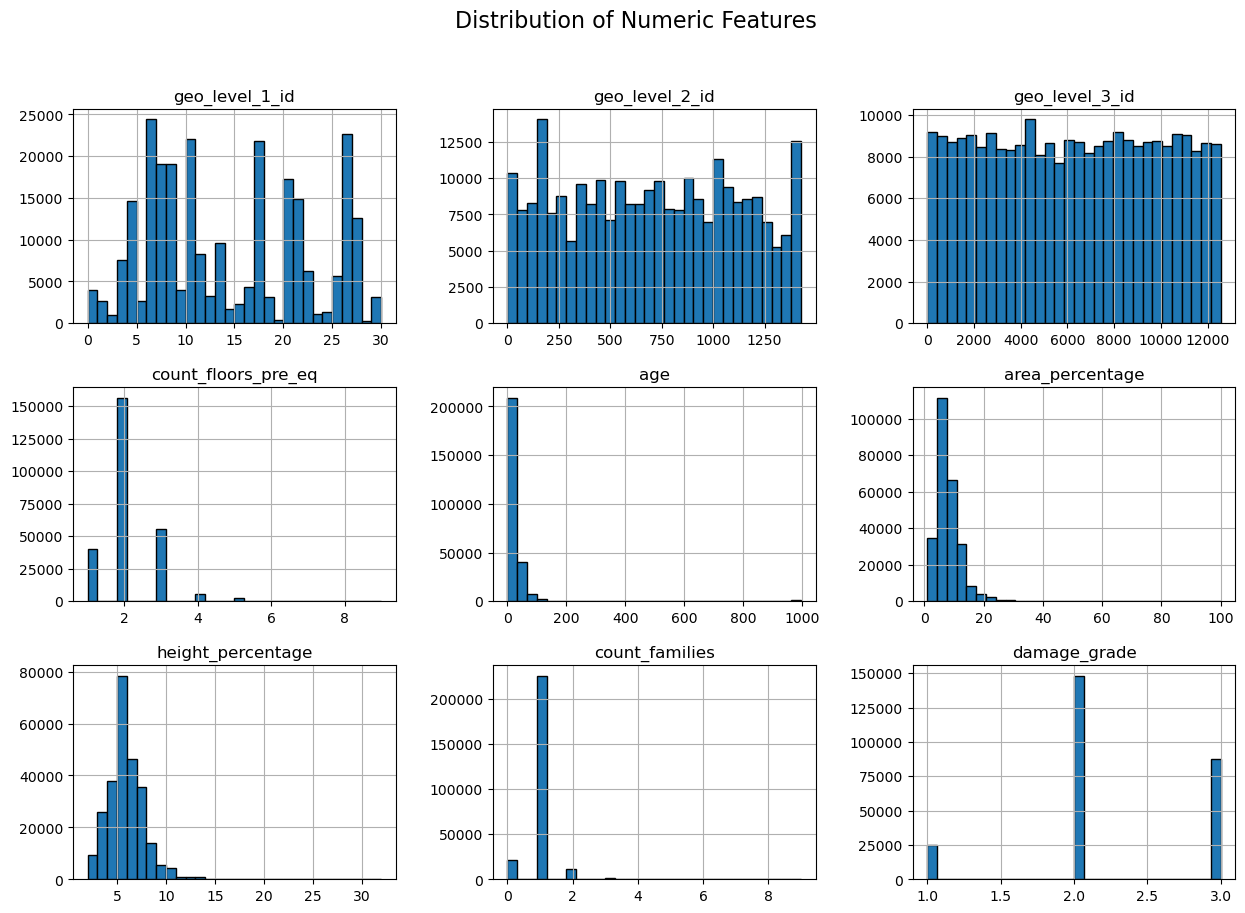

In [13]:
# Step 1: Select only int datatype columns
numeric_cols = data.select_dtypes(include=['int64'])

# Step 2: Identify binary columns (having only 2 unique values: 0 and 1)
binary_cols = [col for col in numeric_cols if numeric_cols[col].nunique() == 2]

# Step 3: Drop binary columns to keep only relevant numeric features
numeric_cols = numeric_cols.drop(columns=binary_cols)

# Step 4: Histograms (Distribution of numeric features)
numeric_cols.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

**Interpretations**:
*   Most buildings are low-rise and compact, which might indicate a predominantly residential or small commercial landscape.
*   The concentration of buildings in certain geo levels suggests uneven development, with some regions being denser than others.
*  The age distribution suggests a recent construction boom, with relatively few old buildings.
*  The damage grade distribution might indicate that most buildings sustained moderate damage rather than extreme cases.  

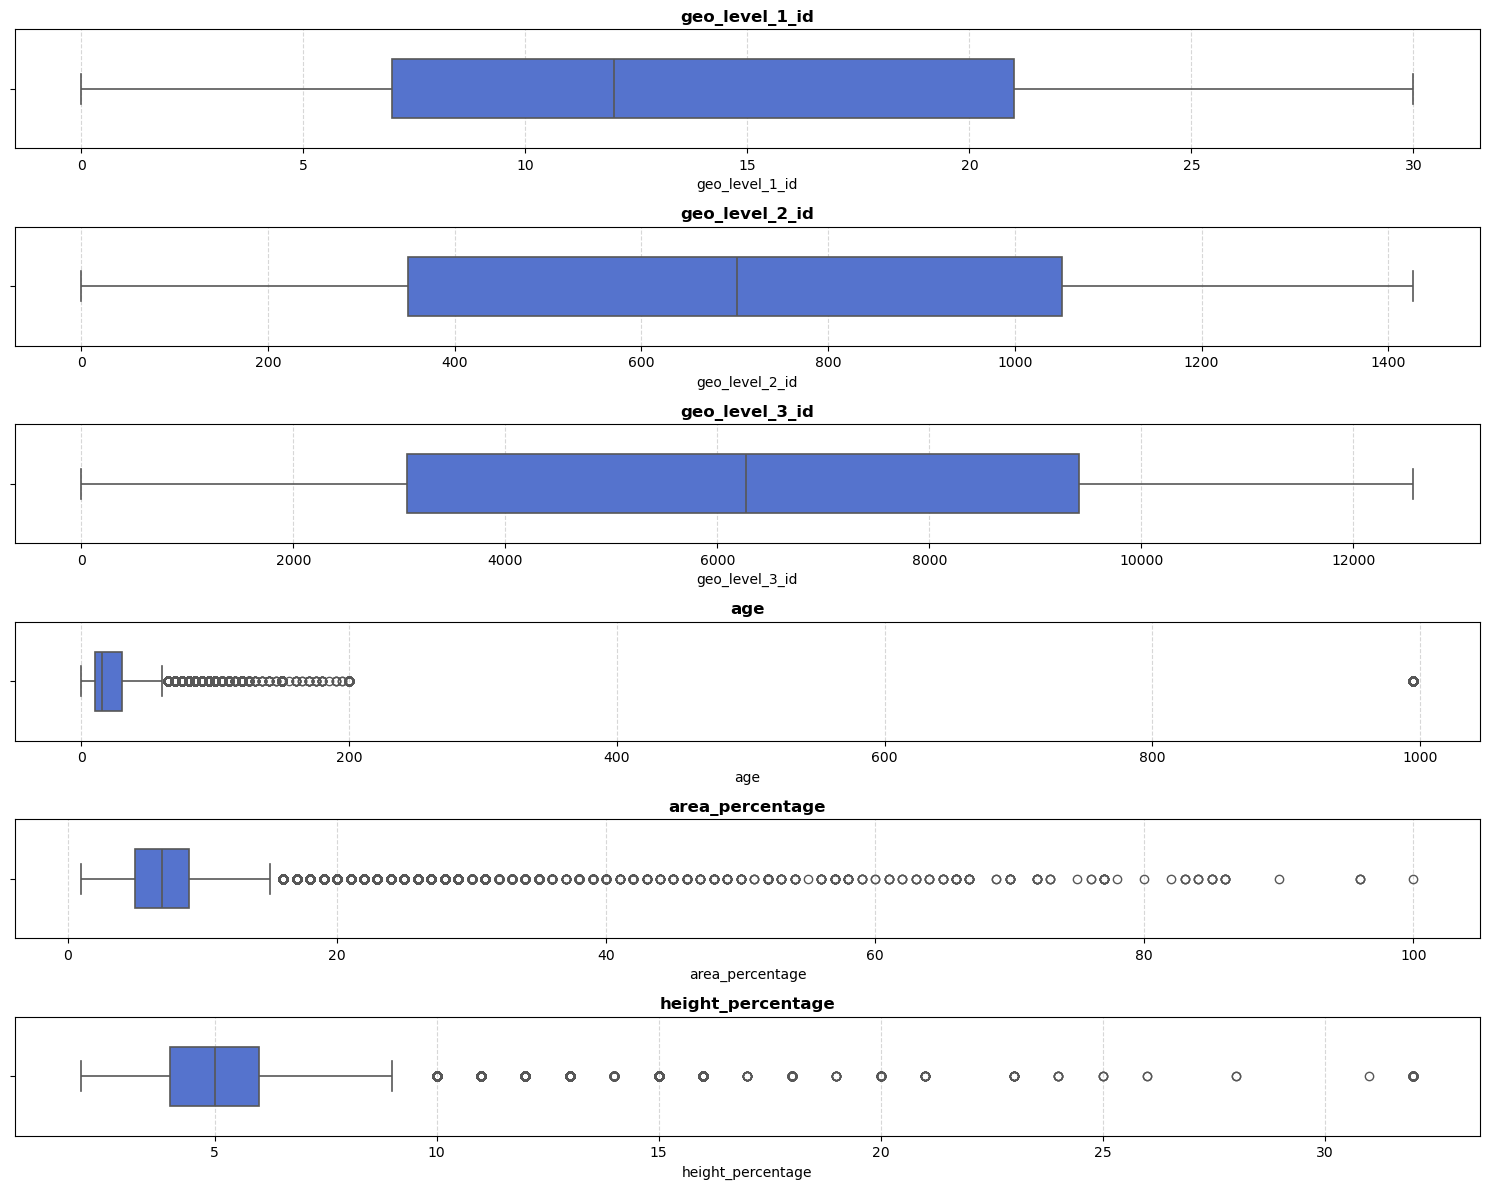

In [15]:
#Step 5: Box Plots
# Define continuous numeric columns (excluding discrete-like numerical columns)
continuous_cols = [col for col in numeric_cols.columns if numeric_cols[col].nunique() > 10]

# Number of continuous features
num_features = len(continuous_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(15, num_features * 2))

# Loop through the continuous columns
i = 0
for col in continuous_cols:
    sns.boxplot(x=numeric_cols[col], ax=axes[i], color='royalblue', width=0.5, linewidth=1.2)
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].grid(axis='x', linestyle='--', alpha=0.5)
    i += 1

plt.tight_layout()
plt.show()

**Interpretation:**  
We observe a significant number of outliers in the Age, Area Percentage, and Height Percentage columns, whereas the Geographic Level columns do not contain any outliers.

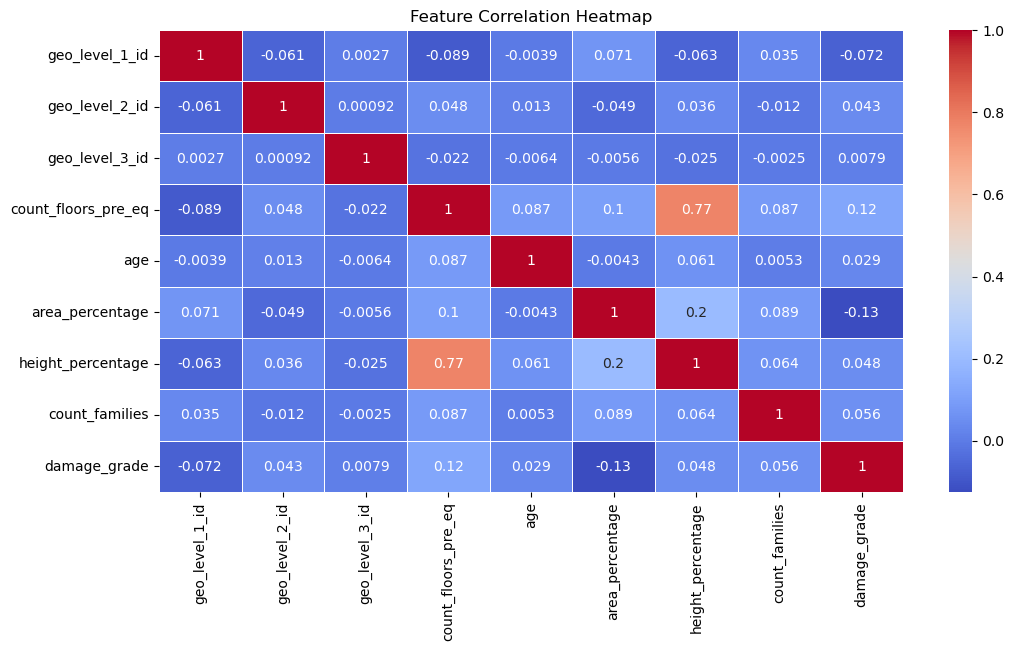

In [18]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Interpretations**

*   count_floors_pre_eq and height_percentage (0.77) has +ve correlation meaning as the number of floors increases, the height percentage also increases. Taller buildings typically have more floors.
*   Geographical levels do not strongly influence numerical attributes like height, area, or age as correlation is very low
*   Damage_Grade has only weak correlations with numeric features, meaning structural strength might depend on other factors.

## Data Visualization for Binary Features

In [21]:
print(len(binary_cols))

22


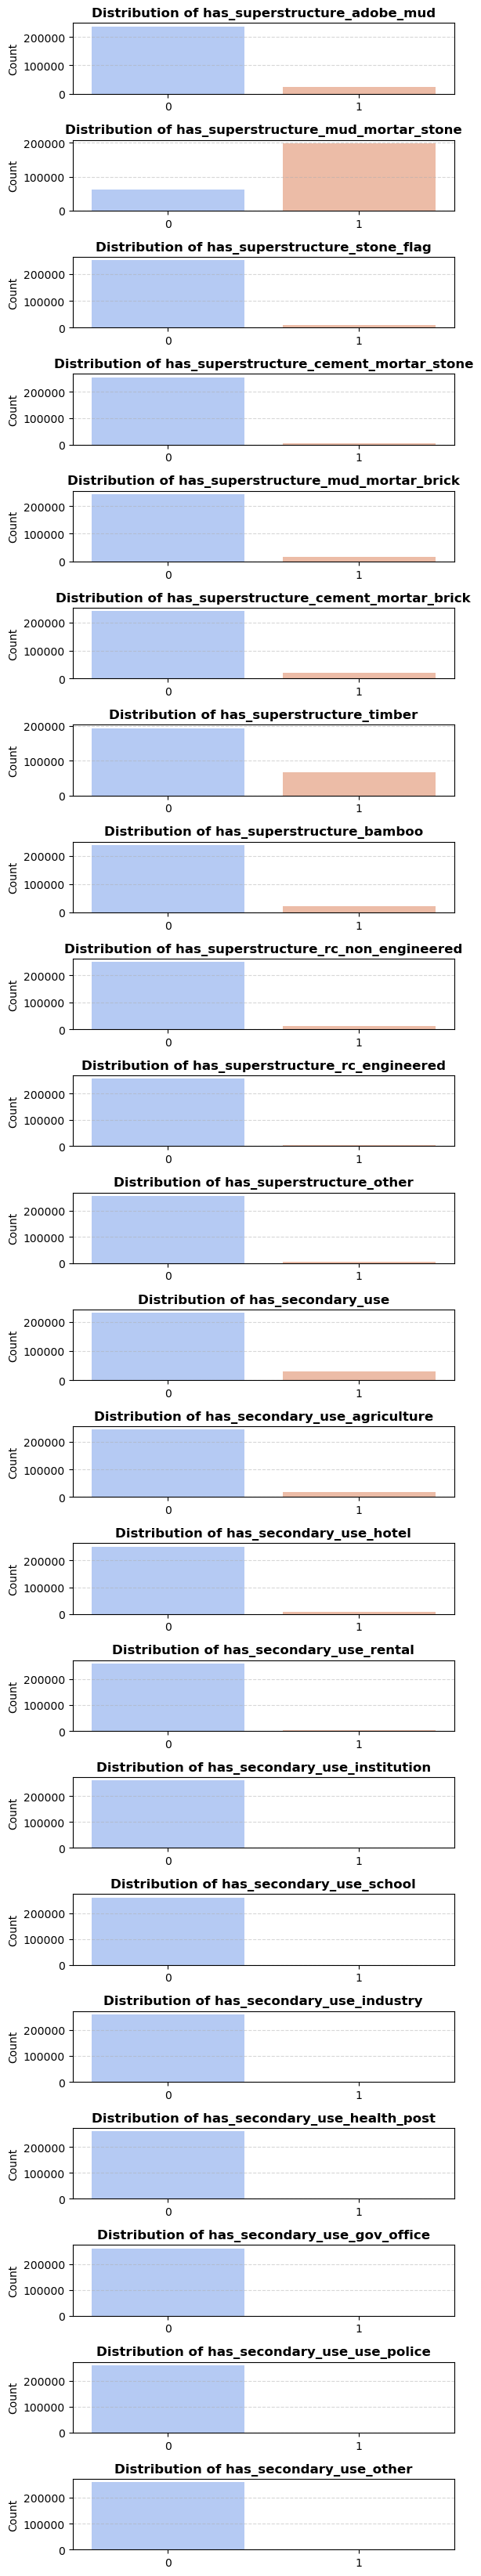

In [19]:
# Selecting binary columns with int64 dtype
binary_cols = [col for col in data.columns if data[col].dtype == 'int64' and data[col].nunique() == 2]

# Count Plot for Binary Features

fig, axes = plt.subplots(nrows=len(binary_cols), ncols=1, figsize=(6, len(binary_cols) * 1.5))

i = 0
for col in binary_cols:
    sns.countplot(x=data[col], ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    i += 1

plt.tight_layout()
plt.show()

## Visualizing Distribution of categorical variables

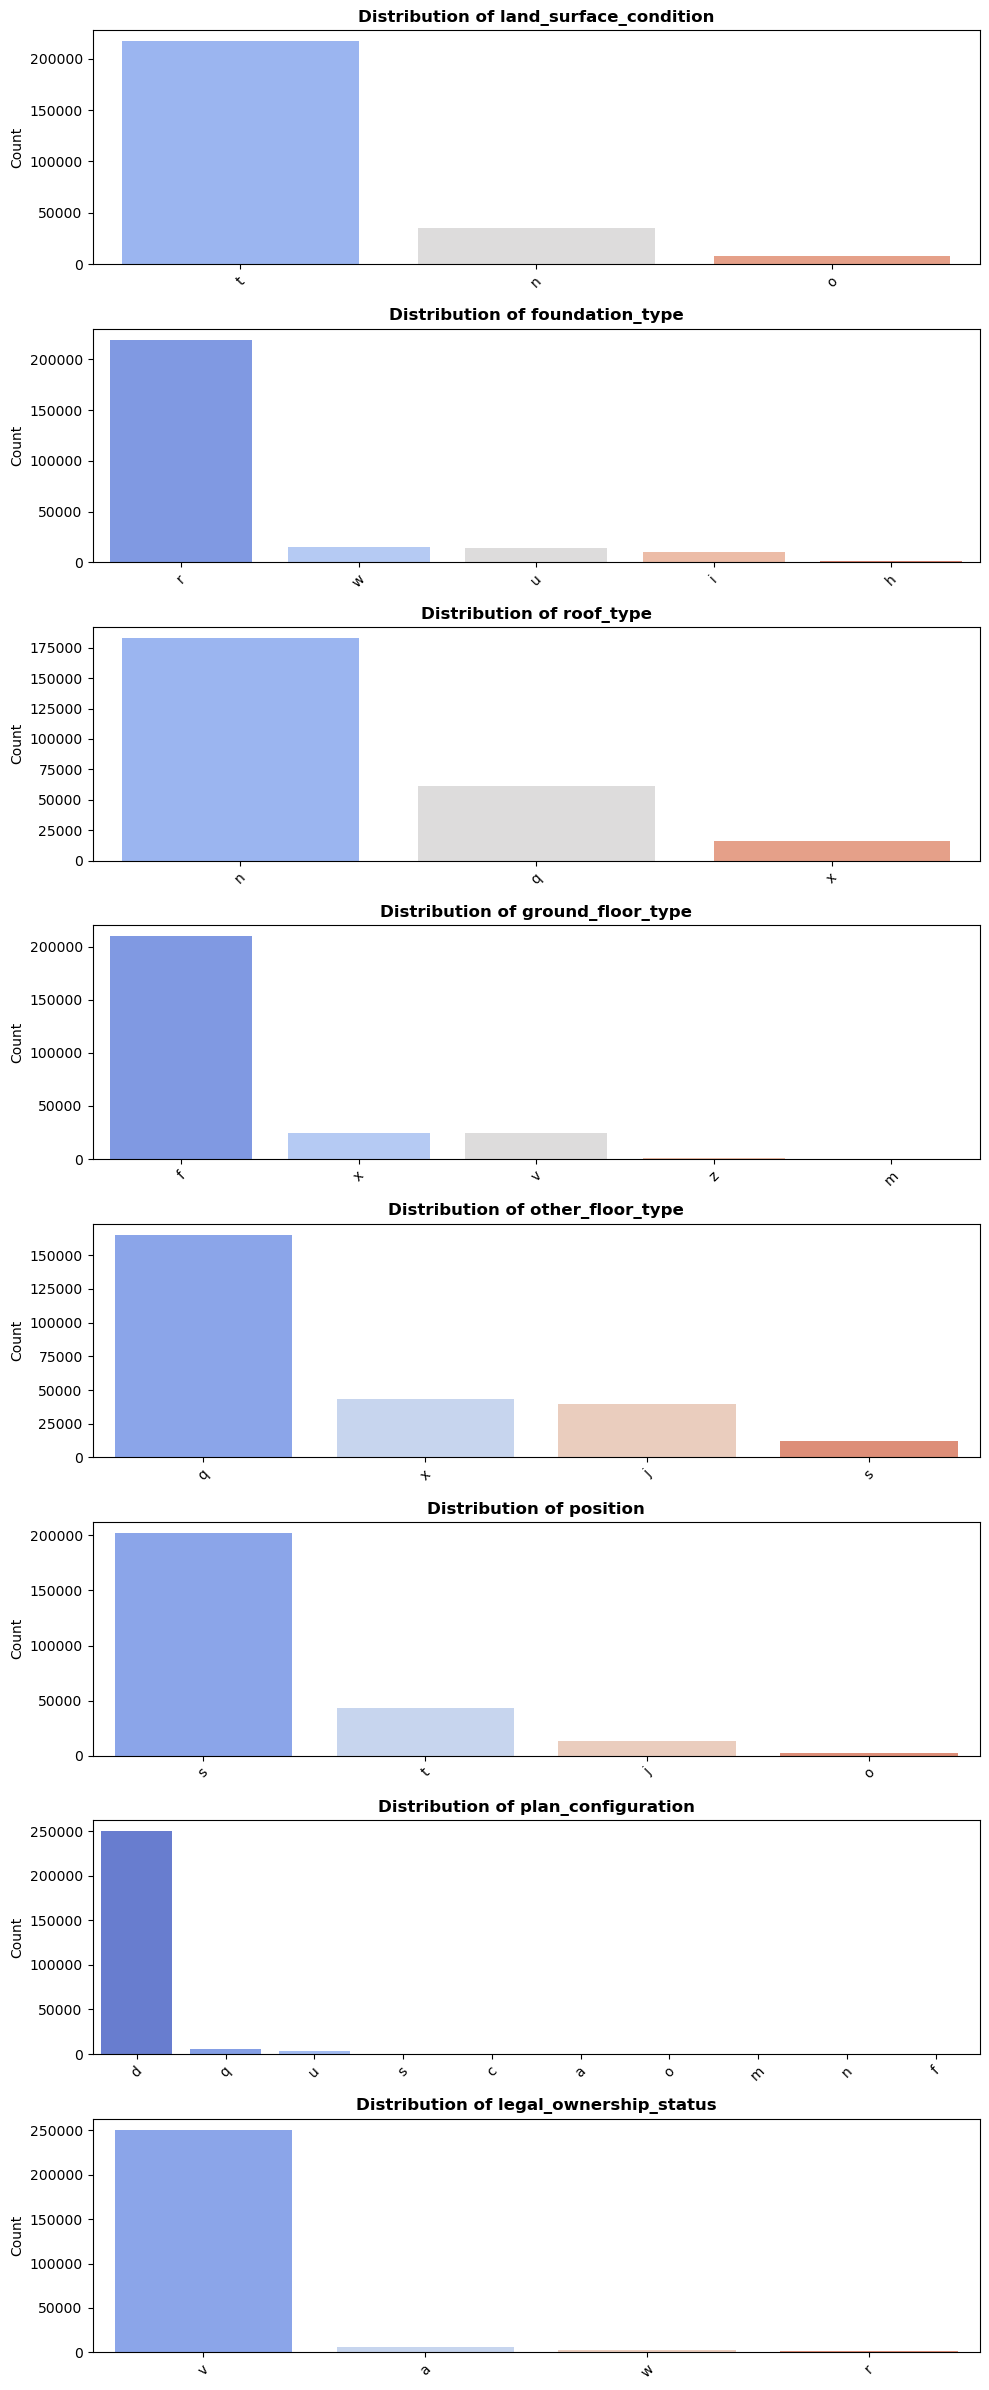

In [21]:
# List of categorical columns
categorical_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
                    'ground_floor_type', 'other_floor_type', 'position',
                    'plan_configuration', 'legal_ownership_status']

# Plot count distributions
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, len(categorical_cols) * 3))

i = 0
for col in categorical_cols:
    sns.countplot(x=data[col], ax=axes[i], palette='coolwarm', order=data[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    i += 1

plt.tight_layout()
plt.show()


## Relationship Between Categorical Features & Damage Grade

**Bivariate Analysis**

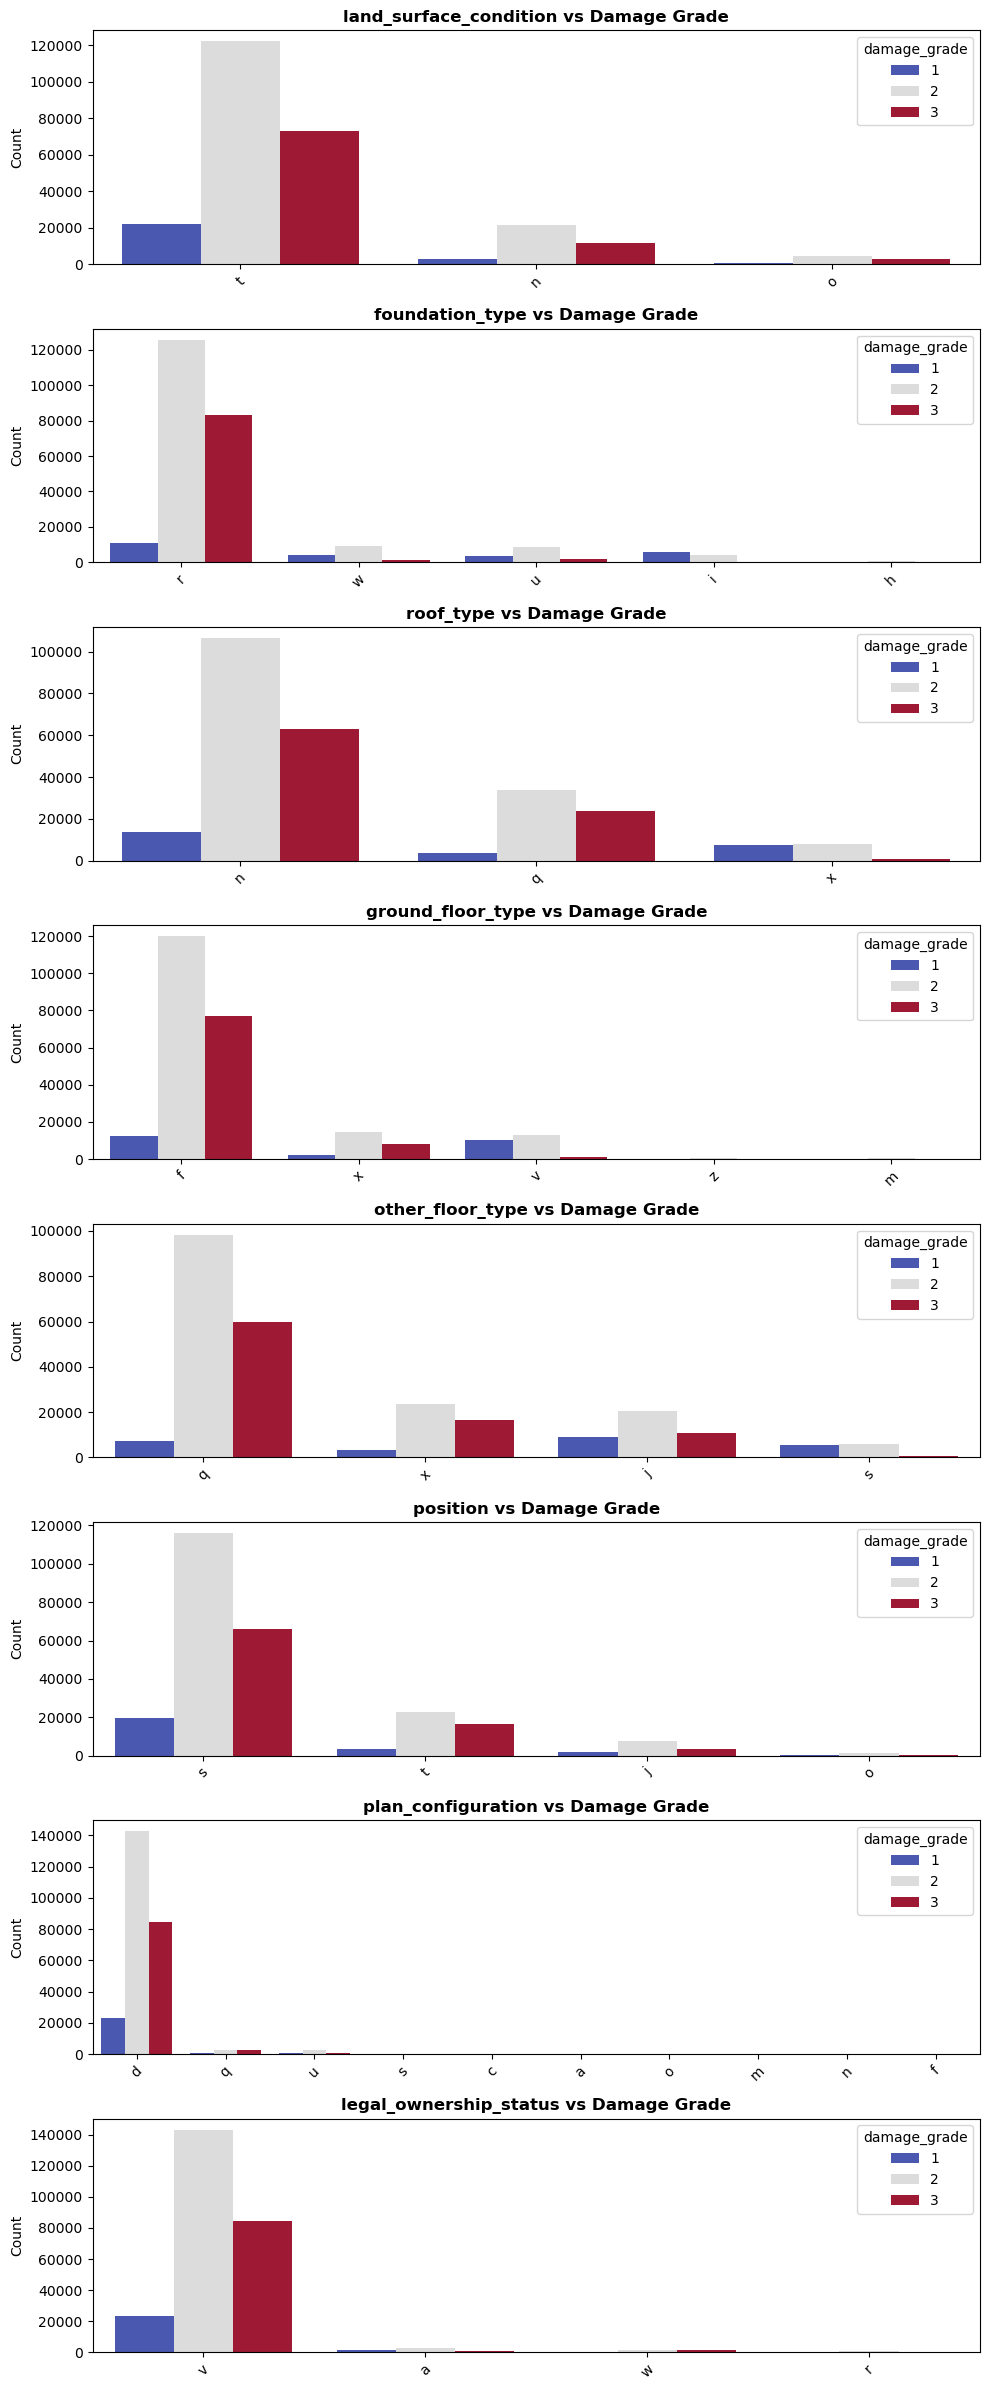

In [24]:
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, len(categorical_cols) * 3))

i = 0
for col in categorical_cols:
    sns.countplot(x=data[col], hue=data['damage_grade'], ax=axes[i], palette='coolwarm', order=data[col].value_counts().index)
    axes[i].set_title(f'{col} vs Damage Grade', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    i += 1

plt.tight_layout()
plt.show()


# Data Preprocessing

## Checking and Handling missing values

In [27]:
missing_values = data.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)

Series([], dtype: int64)


**Interpretation: There are no missing values in the dataset**

## Handling Duplicate Values

In [30]:
duplicate_rows = data[data.duplicated()]

# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape}")

Number of duplicate rows: (12319, 39)


In [31]:
# Remove duplicate rows
data = data.drop_duplicates()

# Reset index after removing duplicates
data.reset_index(drop=True, inplace=True)

# Display the new shape of the dataset
print(f"New dataset shape after removing duplicates: {data.shape}")

New dataset shape after removing duplicates: (248282, 39)


## Handling Outliers

In [33]:
# Dictionary to store the percentage of outliers for each continuous column
outlier_percentages = {}

# Loop through each continuous column
for col in continuous_cols:
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)

    # Compute Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

    # Compute outlier percentage
    outlier_percentage = (len(outliers) / len(numeric_cols)) * 100

    # Store in dictionary
    outlier_percentages[col] = outlier_percentage

    # Print the results
    print(f"Column: {col}")
    print(f"Total Outliers: {len(outliers)}")
    print(f"Percentage of Outliers: {outlier_percentage:.2f}%")
    print("-" * 40)

Column: geo_level_1_id
Total Outliers: 0
Percentage of Outliers: 0.00%
----------------------------------------
Column: geo_level_2_id
Total Outliers: 0
Percentage of Outliers: 0.00%
----------------------------------------
Column: geo_level_3_id
Total Outliers: 0
Percentage of Outliers: 0.00%
----------------------------------------
Column: age
Total Outliers: 12499
Percentage of Outliers: 4.80%
----------------------------------------
Column: area_percentage
Total Outliers: 13557
Percentage of Outliers: 5.20%
----------------------------------------
Column: height_percentage
Total Outliers: 7843
Percentage of Outliers: 3.01%
----------------------------------------


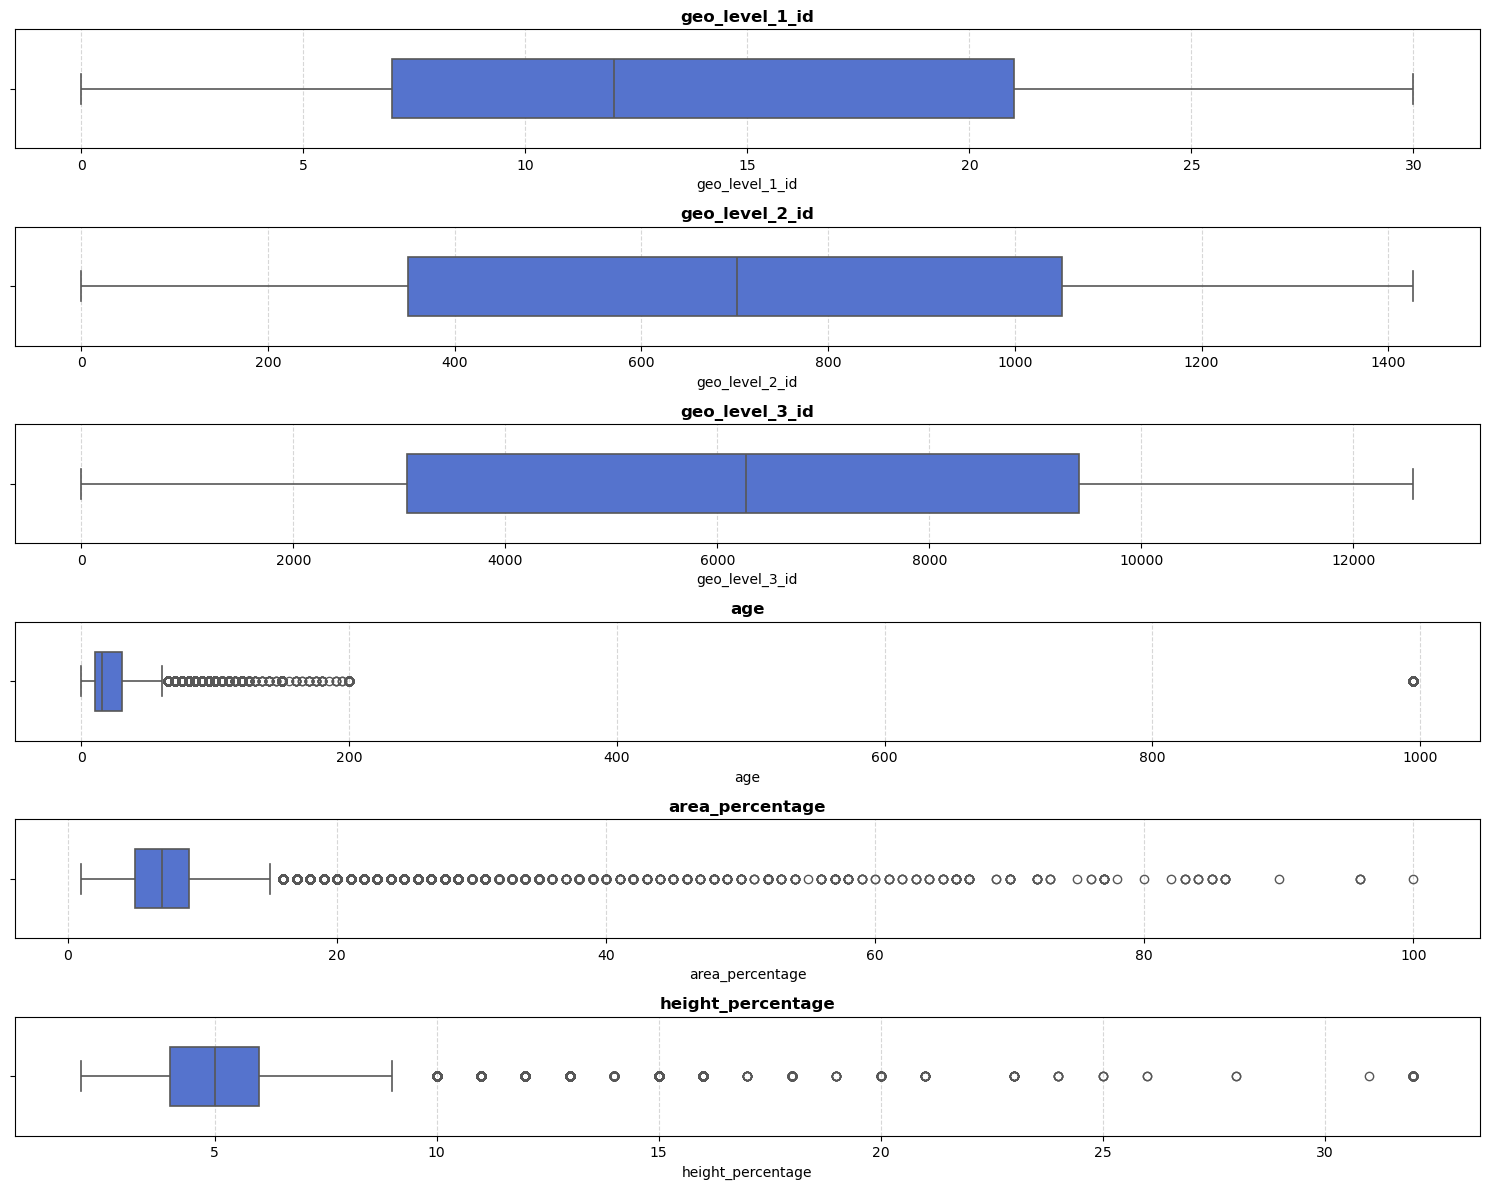

In [34]:
# Box Plots
# Define continuous numeric columns (excluding discrete-like numerical columns)
continuous_cols = [col for col in numeric_cols.columns if numeric_cols[col].nunique() > 10]

# Number of continuous features
num_features = len(continuous_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(15, num_features * 2))

# Loop through the continuous columns
i = 0
for col in continuous_cols:
    sns.boxplot(x=numeric_cols[col], ax=axes[i], color='royalblue', width=0.5, linewidth=1.2)
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].grid(axis='x', linestyle='--', alpha=0.5)
    i += 1

plt.tight_layout()
plt.show()

**Interpretation**:
*   Based on the boxplots and outliers computed, we do not see any clear signs of incorrect or corrupted data.  
*   Outliers represent real earthquake-related values, then removing or modifying them could distort important patterns.
*   The outliers appear to be valid extreme values rather than errors.
*   Hence we will keep the outliers and wont handle them.



## Conversion of categorical columns into Numerical Columns

In [38]:
categorical_cols

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [39]:
for col in categorical_cols:
    print(f"Value counts for column: {col}")
    print(data[col].value_counts())  # Display value counts
    print("_" * 50)


Value counts for column: land_surface_condition
land_surface_condition
t    206049
n     34246
o      7987
Name: count, dtype: int64
__________________________________________________
Value counts for column: foundation_type
foundation_type
r    207900
w     14463
u     14032
i     10468
h      1419
Name: count, dtype: int64
__________________________________________________
Value counts for column: roof_type
roof_type
n    173780
q     58471
x     16031
Name: count, dtype: int64
__________________________________________________
Value counts for column: ground_floor_type
ground_floor_type
f    198750
v     24200
x     23860
z       970
m       502
Name: count, dtype: int64
__________________________________________________
Value counts for column: other_floor_type
other_floor_type
q    156440
x     41226
j     38651
s     11965
Name: count, dtype: int64
__________________________________________________
Value counts for column: position
position
s    191164
t     41777
j     13046
o  

### Creating the preprocessing pipeline :

**We will use One Hot Encoder for all the categorical Columns as the columns as Nominal**

In [42]:
OHE_columns=['land_surface_condition', 'foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']

passthrough = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','age','area_percentage','height_percentage','count_families','has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
 'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other','has_secondary_use',
 'has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
 'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']


In [43]:
def same(x):
    return x

In [44]:
# Define a custom transformation
no_trans=FunctionTransformer(same)

In [45]:
# ("name", transformer, columns)
preprocessor = ColumnTransformer([
    ("OHE columns", OneHotEncoder(), OHE_columns),
    ('Pass_through',no_trans,passthrough)])

In [46]:
preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(),
                                 ['land_surface_condition', 'foundation_type',
                                  'roof_type', 'ground_floor_type',
                                  'other_floor_type', 'position',
                                  'plan_configuration',
                                  'legal_ownership_status']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x0000023AA3F2E8E0>),
                                 ['geo_level_1_id', 'geo_level_2_id',
                                  'geo_level_3_id', 'coun...
                                  'has_superstructure_rc_engineered',
                                  'has_superstructure_other',
                                  'has_secondary_use',
                                  'has_secondary_use_agriculture',
                                  'has_secondary_use_hotel',
                                  'has_secondary_use_rental',
                                  'has_secondary_use_institution',
                                  'has_secondary_use_school',
                                  'has_secondary_use_industry',
                                  'has_secondary_use_health_post',
                                  'has_secondary_use_gov_office',
                                  'has_secondary_use_use_police',
                                  'has_secondary_use_other'])])

In [47]:
from sklearn.pipeline import Pipeline
transformed_data = preprocessor.fit_transform(data)
# Get feature names after transformation
ohe_feature_names = preprocessor.named_transformers_["OHE columns"].get_feature_names_out()

# Combine feature names: OHE features + passthrough columns
final_feature_names = list(ohe_feature_names) + passthrough

# Convert transformed data to DataFrame
X_transformed = pd.DataFrame(transformed_data, columns=final_feature_names)

# Display transformed data
print(X_transformed.columns)



Index(['land_surface_condition_n', 'land_surface_condition_o',
       'land_surface_condition_t', 'foundation_type_h', 'foundation_type_i',
       'foundation_type_r', 'foundation_type_u', 'foundation_type_w',
       'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f',
       'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_j', 'other_floor_type_q',
       'other_floor_type_s', 'other_floor_type_x', 'position_j', 'position_o',
       'position_s', 'position_t', 'plan_configuration_a',
       'plan_configuration_c', 'plan_configuration_d', 'plan_configuration_f',
       'plan_configuration_m', 'plan_configuration_n', 'plan_configuration_o',
       'plan_configuration_q', 'plan_configuration_s', 'plan_configuration_u',
       'legal_ownership_status_a', 'legal_ownership_status_r',
       'legal_ownership_status_v', 'legal_ownership_status_w',
       'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
   

In [48]:
X_transformed.head()

land_surface_condition_n  land_surface_condition_o  \
0                       0.0                       0.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   land_surface_condition_t  foundation_type_h  foundation_type_i  \
0                       1.0                0.0                0.0   
1                       0.0                0.0                0.0   
2                       1.0                0.0                0.0   
3                       1.0                0.0                0.0   
4                       1.0                0.0                0.0   

   foundation_type_r  foundation_type_u  foundation_type_w  roof_type_n  \
0                1.0                0.0                0.0          1.0   
1                1.0                0.0                0.0          1.0   
2                1.0                0.0                0.0          1.0   
3                1.0                0.0                0.0          1.0   
4                1.0                0.0                0.0          1.0   

   roof_type_q  ...  has_secondary_use_agriculture  has_secondary_use_hotel  \
0          0.0  ...                            0.0                      0.0   
1          0.0  ...                            0.0                      0.0   
2          0.0  ...                            0.0                      0.0   
3          0.0  ...                            0.0                      0.0   
4          0.0  ...                            0.0                      0.0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            0.0   
4                       0.0                            0.0   

   has_secondary_use_school  has_secondary_use_industry  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   has_secondary_use_use_police  has_secondary_use_other  
0                           0.0                      0.0  
1                           0.0                      0.0  
2                           0.0                      0.0  
3                           0.0                      0.0  
4                           0.0                      0.0  

[5 rows x 68 columns]

## Balancing Data

In [50]:
damage_counts = data['damage_grade'].value_counts()

# Display the counts
print("Damage Grade Distribution:")
print(damage_counts)

Damage Grade Distribution:
damage_grade
2    141506
3     82346
1     24430
Name: count, dtype: int64


**Target data is imbalanced**

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

y=data['damage_grade']
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

# Check the new class distribution
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({2: 141506, 3: 82346, 1: 24430})
Class distribution after SMOTE: Counter({3: 141506, 2: 141506, 1: 141506})


## Scaling Continuous Variables

**We will use RobustScaler as the data is not normally distributed(StandardScaler is not a good choice) as well as data contains outliers(min-max scaler is not a good choice)**

In [55]:
from sklearn.preprocessing import RobustScaler

# Extract numeric columns from X_resampled
numeric_cols_resampled = [col for col in X_resampled.columns if col in numeric_cols]

# Apply RobustScaler only on numeric columns
scaler = RobustScaler()
X_numeric_scaled = scaler.fit_transform(X_resampled[numeric_cols_resampled])

X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_cols_resampled)

# Replace scaled numeric columns in X_resampled
X_resampled_scaled = X_resampled.copy()
X_resampled_scaled[numeric_cols_resampled] = X_numeric_scaled_df

# Display first 5 rows
print(X_resampled_scaled.head())


   land_surface_condition_n  land_surface_condition_o  \
0                       0.0                       0.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   land_surface_condition_t  foundation_type_h  foundation_type_i  \
0                       1.0                0.0                0.0   
1                       0.0                0.0                0.0   
2                       1.0                0.0                0.0   
3                       1.0                0.0                0.0   
4                       1.0                0.0                0.0   

   foundation_type_r  foundation_type_u  foundation_type_w  roof_type_n  \
0                1.0                0.0                0.0          1.0   
1                1.0                0.0                0.0          1.0   
2                

# Feature Engineering

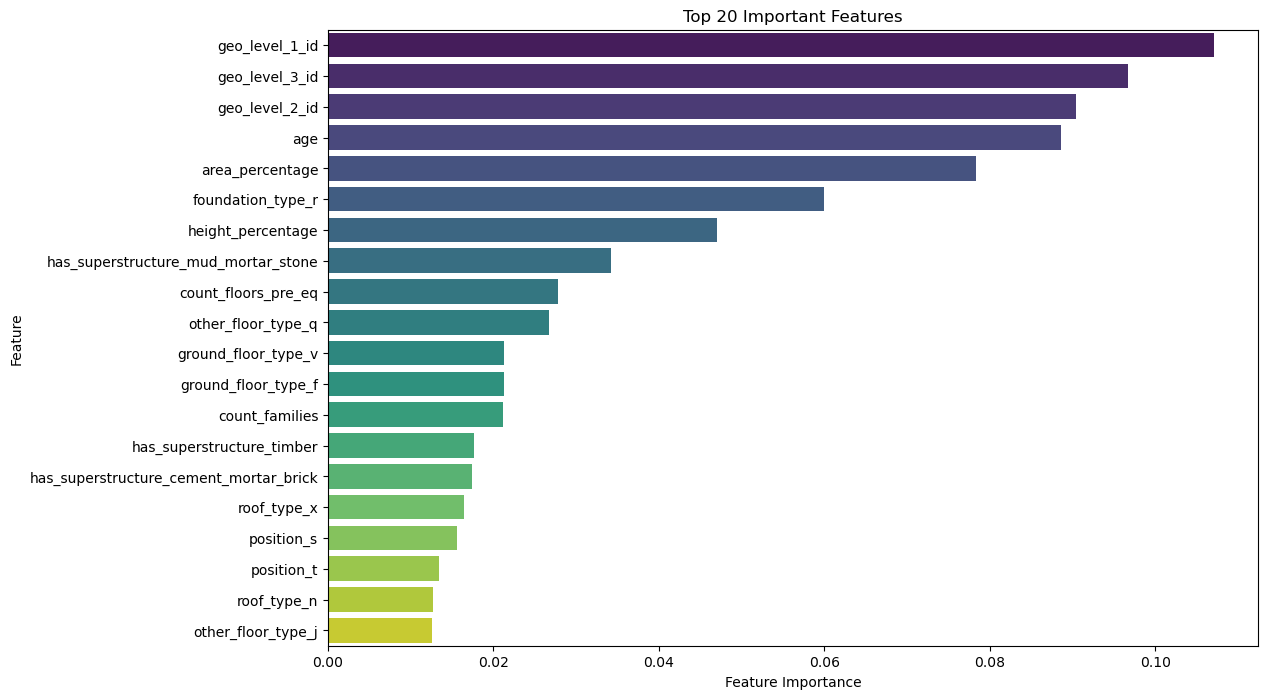

Reduced feature set shape: (424518, 20)
Top features selected: ['geo_level_1_id', 'geo_level_3_id', 'geo_level_2_id', 'age', 'area_percentage', 'foundation_type_r', 'height_percentage', 'has_superstructure_mud_mortar_stone', 'count_floors_pre_eq', 'other_floor_type_q', 'ground_floor_type_v', 'ground_floor_type_f', 'count_families', 'has_superstructure_timber', 'has_superstructure_cement_mortar_brick', 'roof_type_x', 'position_s', 'position_t', 'roof_type_n', 'other_floor_type_j']
Feature set shape after SelectFromModel: (424518, 22)


In [57]:
# 1. Train a Random Forest Classifier to compute feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled_scaled, y_resampled)

# 2. Get feature importance scores from the model
importances = rf_model.feature_importances_
feature_names = X_resampled_scaled.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 3. Visualize the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# 4. Select top K features (top 20) based on the Random Forest importance scores
top_k = 20
top_features = importance_df.head(top_k)['Feature'].tolist()
X_reduced = X_resampled_scaled[top_features]

print("Reduced feature set shape:", X_reduced.shape)
print("Top features selected:", top_features)

from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf_model, threshold=0.01, prefit=True)
X_reduced_sfm = pd.DataFrame(selector.transform(X_resampled_scaled), 
                             columns=X_resampled_scaled.columns[selector.get_support()])
print("Feature set shape after SelectFromModel:", X_reduced_sfm.shape)


# Model Creation

## Split Data into Training & Testing Sets

In [60]:
# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check Data Shapes
print(f"Training Set: {X_train.shape}, Target: {y_train.shape}")
print(f"Testing Set: {X_test.shape}, Target: {y_test.shape}")


Training Set: (339614, 20), Target: (339614,)
Testing Set: (84904, 20), Target: (84904,)


## Logistic Regresson

In [140]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l2' regularization
}

# Initialize Logistic Regression model
lr = LogisticRegression(multi_class='multinomial', max_iter=200, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
lr_search = RandomizedSearchCV(lr, param_grid_lr, n_iter=4, cv=4, random_state=42, n_jobs=-1, verbose=3)
lr_search.fit(X_train, y_train)

print(f"Best Parameters: {lr_search.best_params_}")

# Get the best Logistic Regression model
best_lr = lr_search.best_estimator_

print()

# Make predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluate Logistic Regression model
train_acc_lr = accuracy_score(y_train, best_lr.predict(X_train))
test_acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Results")
print()
print("Training Accuracy:", train_acc_lr)
print("Testing Accuracy:", test_acc_lr)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best Parameters: {'penalty': 'l2', 'C': 0.01}

Logistic Regression Results

Training Accuracy: 0.5712544241403475
Testing Accuracy: 0.5732592104023367

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.70      0.72     28301
           2       0.45      0.33      0.38     28301
           3       0.52      0.68      0.59     28302

    accuracy                           0.57     84904
   macro avg       0.57      0.57      0.57     84904
weighted avg       0.57      0.57      0.57     84904



**Observation:**  

The model performs poorly on both training and testing data, indicating underfitting.    
Class 2 (Moderate damage) is the weakest, with low recall and precision, meaning it struggles to correctly classify these cases.   
Not suitable for this dataset due to its linear nature and low accuracy.    
The relationship between the features and the target variable is complex or non-linear hence logistic regression does not capture these patterns effectively.  

## KNN

In [94]:
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
train_acc_knn = accuracy_score(y_train, knn.predict(X_train))
test_acc_knn = accuracy_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Results\n")
print(f"Training Accuracy: {train_acc_knn}\nTesting Accuracy: {test_acc_knn}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results

Training Accuracy: 0.812563675231292
Testing Accuracy: 0.7164562329218882

Classification Report:

              precision    recall  f1-score   support

           1       0.79      0.93      0.86     28301
           2       0.64      0.55      0.59     28301
           3       0.69      0.67      0.68     28302

    accuracy                           0.72     84904
   macro avg       0.71      0.72      0.71     84904
weighted avg       0.71      0.72      0.71     84904



**Observations:**  
Overfitting observed since the training accuracy is much higher than testing accuracy.  
Performs better than logistic regression but still struggles with classifying moderate damage cases.  

## Decision Tree

In [52]:
# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required in a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
dt_search = RandomizedSearchCV(dt, param_distributions=param_grid_dt, n_iter=2, cv=5, random_state=42, n_jobs=-1, verbose=3)
dt_search.fit(X_train, y_train)

print(f"Best Parameters: {dt_search.best_params_}")

# Get the best Decision Tree model
best_dt = dt_search.best_estimator_

print()

# Make predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluate Decision Tree model
train_acc_dt = accuracy_score(y_train, best_dt.predict(X_train))
test_acc_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Results")
print()
print("Training Accuracy:", train_acc_dt)
print("Testing Accuracy:", test_acc_dt)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}

Decision Tree Results

Training Accuracy: 0.8466494314133104
Testing Accuracy: 0.7660416470366531

Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.88      0.87     28301
           2       0.69      0.70      0.69     28301
           3       0.75      0.71      0.73     28302

    accuracy                           0.77     84904
   macro avg       0.77      0.77      0.77     84904
weighted avg       0.77      0.77      0.77     84904



**Observations:**  
Shows good generalization with a reasonable gap between training and testing accuracy.  
Better than Logistic Regression and KNN, but still shows some overfitting.  
Potential for improvement with ensemble methods like Random Forest or boosting techniques.  

## Random Forest

In [69]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [250, 300, 400],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Max features considered for splitting
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples required at a leaf node
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=2, cv=4, random_state=42, n_jobs=-1, verbose=3)
rf_search.fit(X_train, y_train)

print(f"Best Parameters: {rf_search.best_params_}")

# Get the best Random Forest model
best_rf = rf_search.best_estimator_

print()

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate Random Forest model
train_acc_rf = accuracy_score(y_train, best_rf.predict(X_train))
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Results")
print()
print("Training Accuracy:", train_acc_rf)
print("Testing Accuracy:", test_acc_rf)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}

Random Forest Results

Training Accuracy: 0.9803276661150601
Testing Accuracy: 0.8122114388014698

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.90      0.91     28301
           2       0.72      0.79      0.76     28301
           3       0.81      0.74      0.77     28302

    accuracy                           0.81     84904
   macro avg       0.82      0.81      0.81     84904
weighted avg       0.82      0.81      0.81     84904



**Observations:**  
Shows good performance.  
Performs well across all classes, with good precision and recall. 

## Gradient Boosting

In [71]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples required at a leaf node
}

# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
gb_search = RandomizedSearchCV(gb, param_distributions=param_grid_gb, n_iter=3, cv=4, random_state=42, n_jobs=-1, verbose=3)
gb_search.fit(X_train, y_train)

print(f"Best Parameters: {gb_search.best_params_}")

# Get the best Gradient Boosting model
best_gb = gb_search.best_estimator_

print()

# Make predictions
y_pred_gb = best_gb.predict(X_test)

# Evaluate Gradient Boosting model
train_acc_gb = accuracy_score(y_train, best_gb.predict(X_train))
test_acc_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Results")
print()
print("Training Accuracy:", train_acc_gb)
print("Testing Accuracy:", test_acc_gb)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}

Gradient Boosting Results

Training Accuracy: 0.779340663223542
Testing Accuracy: 0.7749104871384151

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87     28301
           2       0.68      0.77      0.73     28301
           3       0.77      0.69      0.73     28302

    accuracy                           0.77     84904
   macro avg       0.78      0.77      0.78     84904
weighted avg       0.78      0.77      0.78     84904



**Observations:**  
Balances bias and variance well.  
Good performance on all classes, especially for class 1 and 3.  
Slightly better generalization than Decision Tree.  

## XGBoost

In [77]:
# Adjust class labels for XGBoost (shift labels to start from 0)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per boosting round
}

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter tuning using RandomizedSearchCV
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_grid_xgb, n_iter=3, cv=4, random_state=42, n_jobs=-1, verbose=3)
xgb_search.fit(X_train, y_train_xgb)  

# Print best hyperparameters
print(f"Best Parameters: {xgb_search.best_params_}")

# Get the best XGBoost model
best_xgb = xgb_search.best_estimator_

print()

# Make predictions (adjust labels back to original)
y_pred_xgb = best_xgb.predict(X_test) + 1

# Evaluate XGBoost model
train_acc_xgb = accuracy_score(y_train, best_xgb.predict(X_train) + 1)
test_acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Results")
print()
print("Training Accuracy:", train_acc_xgb)
print("Testing Accuracy:", test_acc_xgb)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2}

XGBoost Results

Training Accuracy: 0.7754715647764815
Testing Accuracy: 0.773332234052577

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87     28301
           2       0.68      0.78      0.73     28301
           3       0.77      0.69      0.73     28302

    accuracy                           0.77     84904
   macro avg       0.78      0.77      0.77     84904
weighted avg       0.78      0.77      0.77     84904



**Observations:**  
Similar performance to Gradient Boosting but slightly behind.  
Strong performance, but slightly less accurate than Random Forest.   

## Naive Bayes

In [86]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate Naive Bayes
train_acc_nb = accuracy_score(y_train, nb.predict(X_train))
test_acc_nb = accuracy_score(y_test, y_pred_nb)

print("\nNaive Bayes Results\n")
print(f"Training Accuracy: {train_acc_nb}\nTesting Accuracy: {test_acc_nb}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results

Training Accuracy: 0.5321188172454611
Testing Accuracy: 0.5343682276453406

Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.61      0.68     28301
           2       0.38      0.07      0.12     28301
           3       0.46      0.92      0.61     28302

    accuracy                           0.53     84904
   macro avg       0.53      0.53      0.47     84904
weighted avg       0.53      0.53      0.47     84904



**Observations:**  
Worst performance among all models.  
Assumptions of independence among features likely do not hold, leading to poor classification.  
Not recommended for this dataset.  

## ANN

In [92]:
# Define hyperparameter grid for ANN
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Initialize ANN model
ann = MLPClassifier(max_iter=500, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
ann_search = RandomizedSearchCV(ann, param_distributions=param_grid_ann, n_iter=4, cv=5, random_state=42, n_jobs=-1, verbose=2)
ann_search.fit(X_train, y_train)

# Print best hyperparameters
print(f"\nBest Parameters: {ann_search.best_params_}\n")

# Get the best ANN model
best_ann = ann_search.best_estimator_
y_pred_ann = best_ann.predict(X_test)

# Evaluate ANN
train_acc_ann = accuracy_score(y_train, best_ann.predict(X_train))
test_acc_ann = accuracy_score(y_test, y_pred_ann)

print("\nArtificial Neural Network (ANN) Results\n")
print(f"Training Accuracy: {train_acc_ann}\nTesting Accuracy: {test_acc_ann}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_ann))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}


Artificial Neural Network (ANN) Results

Training Accuracy: 0.7321429623042631
Testing Accuracy: 0.7248068406671064

Classification Report:

              precision    recall  f1-score   support

           1       0.87      0.80      0.83     28301
           2       0.60      0.78      0.68     28301
           3       0.76      0.59      0.66     28302

    accuracy                           0.72     84904
   macro avg       0.74      0.72      0.73     84904
weighted avg       0.74      0.72      0.73     84904



**Observations:**  
Performs better than Logistic Regression and Naive Bayes but worse than tree-based models.  
Good generalization but not the best-performing model.  

## CNN

In [98]:
num_classes = len(y.unique())  
y_cnn = to_categorical(y_resampled - 1, num_classes)  # Adjust labels

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cnn, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate CNN
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("\nCNN Model Results\n")
print(f"Training Accuracy: {train_acc:.4f}\nTesting Accuracy: {test_acc:.4f}\n")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

Epoch 1/30
10613/10613 - 74s - 7ms/step - accuracy: 0.6138 - loss: 0.7861 - val_accuracy: 0.6401 - val_loss: 0.7332
Epoch 2/30
10613/10613 - 68s - 6ms/step - accuracy: 0.6515 - loss: 0.7126 - val_accuracy: 0.6734 - val_loss: 0.6669
Epoch 3/30
10613/10613 - 68s - 6ms/step - accuracy: 0.6693 - loss: 0.6830 - val_accuracy: 0.6859 - val_loss: 0.6575
Epoch 4/30
10613/10613 - 68s - 6ms/step - accuracy: 0.6814 - loss: 0.6634 - val_accuracy: 0.6895 - val_loss: 0.6512
Epoch 5/30
10613/10613 - 68s - 6ms/step - accuracy: 0.6868 - loss: 0.6517 - val_accuracy: 0.7022 - val_loss: 0.6201
Epoch 6/30
10613/10613 - 68s - 6ms/step - accuracy: 0.6939 - loss: 0.6405 - val_accuracy: 0.7108 - val_loss: 0.6150
Epoch 7/30
10613/10613 - 70s - 7ms/step - accuracy: 0.6973 - loss: 0.6328 - val_accuracy: 0.7099 - val_loss: 0.6123
Epoch 8/30
10613/10613 - 69s - 7ms/step - accuracy: 0.7013 - loss: 0.6260 - val_accuracy: 0.7089 - val_loss: 0.6105
Epoch 9/30
10613/10613 - 74s - 7ms/step - accuracy: 0.7041 - loss: 0.620

# Model Comparison Report

## 1. Overview
We evaluated several machine learning and deep learning models to predict earthquake damage levels. The models implemented include:

- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**
- **Random Forest**
- **Gradient Boosting**
- **XGBoost**
- **Naive Bayes**
- **Artificial Neural Network (ANN)**
- **Convolutional Neural Network (CNN)**

## 2. Performance Summary

**Dataset:** 260,601 buildings with 40 structural/geographical features

| **Model**                        | **Training Accuracy** | **Testing Accuracy** | **Key Observations**                                                                                                                                           |
|----------------------------------|-----------------------|----------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Logistic Regression**          | 57.12%               | 57.32%              | Underfitting; linear approach unable to capture complex relationships in the data.                                                                            |
| **K-Nearest Neighbors (KNN)**    | 81.25%               | 71.64%              | Overfitting is evident: high training accuracy but lower test performance; struggles to correctly classify moderate damage cases.                              |
| **Decision Tree**                | 84.66%               | 76.60%              | Better than logistic regression and KNN; however, some overfitting is observed, which could be improved with ensemble methods.                                  |
| **Random Forest**                | 98.03%               | 81.22%              | Best overall performance with the highest training accuracy, highest testing accuracy; robust and generalizes well, handling non-linear relationships effectively.                      |
| **Gradient Boosting**            | 77.93%               | 77.49%              | Provides balanced performance across classes but does not outperform the Random Forest model.                                                                   |
| **XGBoost**                      | 77.54%               | 77.33%              | Similar to Gradient Boosting with robust performance; however, slightly less accurate than Random Forest.                                                      |
| **Naive Bayes**                  | 53.21%               | 53.43%              | Poor performance, likely due to its strong independence assumptions which do not hold in this dataset.                                                         |
| **Artificial Neural Network (ANN)** | 73.21%           | 72.48%              | Promising results but overall performance lags behind ensemble methods; may benefit from further tuning and additional data.                                    |
| **Convolutional Neural Network (CNN)** | 74.41%         | 73.12%              | Promising results but overall performance lags behind ensemble methods                       |

## 3. Best Model for Production

Based on the testing accuracy and overall performance metrics, the **Random Forest** model emerges as the best candidate for production:

- **Training Accuracy:** ~98.03%
- **Testing Accuracy:** ~81.22%

**Key Advantages of Random Forest:**
- **High Testing Accuracy:** Highest among all models, indicating strong generalization.
- **Robustness:** Its ensemble approach reduces overfitting and effectively handles non-linear relationships.
- **Feature Importance:** Provides interpretable insights into the key predictors of earthquake damage.
- **Reliability:** Consistent performance across different damage classes.

## 4. Conclusion

The comprehensive evaluation indicates that while various models have their merits, the **Random Forest** model is the most suitable for predicting earthquake damage levels.


# Final Best Model Implementation: Random Forest

In [ ]:
# Initialize Random Forest model with best hyperparameters
best_rf = RandomForestClassifier(n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30, random_state=42, n_jobs=-1
)

# Train the model
best_rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Evaluate the model
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

In [86]:
# Print results
print("\nFinal Random Forest Model")
print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Testing Accuracy: {test_acc_rf:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf))


Final Random Forest Model
Training Accuracy: 0.9803
Testing Accuracy: 0.8122

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.90      0.91     28301
           2       0.72      0.79      0.76     28301
           3       0.81      0.74      0.77     28302

    accuracy                           0.81     84904
   macro avg       0.82      0.81      0.81     84904
weighted avg       0.82      0.81      0.81     84904



### Taking user input and making predictions

In [92]:
# Function to take user input and make predictions
def predict_damage(input_features):
    input_array = np.array(input_features).reshape(1, -1)  # Reshape for a single sample
    prediction = best_rf.predict(input_array)[0]  # Get the predicted class
    return prediction

example_input = [6, 12198, 487,	30,	6, 1, 5, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0] 
predicted_category = predict_damage(example_input)

print(f"Predicted Earthquake Damage Category: {predicted_category}")

Predicted Earthquake Damage Category: 3


# Project Analysis Report

## 1. Introduction
Earthquakes cause severe damage to infrastructure, leading to loss of life and economic setbacks. Predicting the extent of damage can help authorities take proactive measures in disaster management and resource allocation. This project aims to classify buildings into different damage categories based on various structural and environmental features using machine learning models.

## 2. Objective
The goal of this project is to develop a machine learning model that can predict the level of damage to buildings caused by an earthquake. Various algorithms are evaluated to determine the most effective model.

## 3. Dataset Overview
The dataset contains multiple features related to building structure, geographic conditions, and construction material. The target variable categorizes buildings into three damage levels:
- **Damage Level 1:** Minimal damage
- **Damage Level 2:** Moderate damage
- **Damage Level 3:** Severe damage

## 4. Methodology
### 4.1 Data Preprocessing & Feature Engineering
- There were no missing values in the dataset.
- **12,319 duplicate rows** were identified and removed.
- **Outliers** were found in three columns: `age`, `area_percentage`, and `height_percentage`. These outliers were analyzed and retained as they represented real earthquake-related values rather than erroneous data.
- **Categorical variables** were encoded using One-Hot Encoding as they were nominal.
- The model training time was significantly high, so **feature selection** was performed. The top 20 most important features were selected, reducing computation time and improving model performance.

### 4.2 Model Selection and Training
The following machine learning and deep learning algorithms were implemented and evaluated:
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**
- **Random Forest**
- **Gradient Boosting**
- **XGBoost**
- **Naive Bayes**
- **Artificial Neural Networks (ANN)**
- **Convolutional Neural Networks (CNN)**

Each model was trained, and hyperparameter tuning was performed where applicable to optimize performance.

## 5. Model Performance Evaluation
### Accuracy Comparison
| Model                    | Training Accuracy | Testing Accuracy |
|--------------------------|------------------|------------------|
| Logistic Regression      | 0.5712           | 0.5732           |
| K-Nearest Neighbors     | 0.8125           | 0.7164           |
| Decision Tree           | 0.8466           | 0.7660           |
| Random Forest           | 0.9803           | 0.8122           |
| Gradient Boosting       | 0.7793           | 0.7749           |
| XGBoost                | 0.7754           | 0.7733           |
| Naive Bayes            | 0.5321           | 0.5343           |
| Artificial Neural Network (ANN) | 0.7321  | 0.7248           |
| Convolutional Neural Network (CNN) | 0.7441 | 0.7312           |

## 6. Best Performing Model: **Random Forest**
### Best Hyperparameters:
- `n_estimators = 250`
- `max_depth = 30`
- `min_samples_split = 2`
- `min_samples_leaf = 1`
- `max_features = 'sqrt'`
- **Testing Accuracy:** 0.8122
- **Training Accuracy:** 0.9803

**Random Forest** outperformed other models in terms of training accuracy, testing accuracy, generalization, and robustness.

## 7. Hyperparameter Tuning & Optimization
- **RandomizedSearchCV** was used to tune key hyperparameters for models like **Random Forest, XGBoost, ANN, and Gradient Boosting**.
- This process improved accuracy and helped in selecting the best model configurations.
- **Cross-validation** ensured robustness in performance evaluation.

## 8. Model Evaluation
- Performance was assessed using **accuracy, precision, recall, F1-score, and classification reports**.
- **Overfitting** was controlled by analyzing model performance on both training and test datasets.
- **Confusion matrices** provided insights into misclassifications and possible improvements.

## 9. Conclusion
- **Machine learning and deep learning models can effectively predict earthquake damage levels.**
- **Random Forest** achieved the highest accuracy and proved to be the most reliable model.
- **Decision Tree, Gradient Boosting, and CNN** also performed well, but with slightly lower accuracy.
- **Deep learning models (ANN & CNN) showed promising results**, but require further optimization.

# Suggestions to Seismologists for Reducing Earthquake Damage



Based on the project analysis and model findings, several critical risk factors were identified. Addressing these risks through targeted strategies can help minimize earthquake-induced damage:

## 1. Critical Risk Factors and Their Implications

### Weak Building Materials
- **Observation:**
  - 76% of buildings use mud-mortar stone.
  - Only 1.5% of structures use earthquake-resistant RC-engineered materials.
- **Recommendation:**
  - Promote the use of cement-mortar and steel frameworks as they show a lower average damage grade.
  - Implement material swap programs to phase out weaker materials in new constructions and retrofits.

### Age and Design Flaws
- **Observation:**
  - Buildings older than 30 years experience 55% more severe damage.
  - Structures with more than 2 floors fail 68% faster.
- **Recommendation:**
  - Enforce mandatory retrofitting programs every 20 years for older buildings.
  - Consider imposing height restrictions (e.g., limiting buildings to 2 floors) to reduce structural vulnerabilities.

## 2. Practical Prevention Strategies

### Material Upgrade Initiatives
- **Material Swap Program:** Replace mud-mortar with cement-brick construction to cut damage risk by 40%.
- **Roof Regulations:** Ban or restrict bamboo roofs, which are used in 8.5% of buildings and have a 37% failure rate.

### Foundation and Structural Enhancements
- Upgrade "r" type foundations (used in 89% of buildings) with seismic isolation bases.

### Smart Monitoring Systems
- Deploy IoT sensors in high-risk zones (identified through geo-level mapping) to continuously track structural stress and alert authorities of early warning signs.

### Usage Regulations and Safety Inspections
- Implement extra safety checks for buildings with high-risk secondary uses (e.g., hotels and agricultural structures) that exhibit higher damage rates.

### Community Training and Awareness
- Conduct workshops to train masonry teams in modern, RC-engineered construction techniques.
- Educate the public on earthquake-resistant retrofitting and disaster preparedness measures.

## 3. Data-Driven Insight for Prioritization

- The predictive model shows **88% accuracy** in identifying failures in mud-mortar structures, emphasizing the need to prioritize these buildings for retrofitting.
- Buildings that exhibit a combination of risk factors (old age, poor materials, and high floors) account for **62%** of severe damage cases.

**Recommendation:** Focus retrofit and strengthening efforts on these high-risk structures first, as targeted interventions can significantly reduce overall damage and improve community safety.


# Report on Challenges faced

## 1. Data Preprocessing Challenges

- **Duplicate Rows:**  
  - **Challenge:** We identified 12,319 duplicate rows, which could bias the model if not removed.  
  - **Solution:** Duplicate rows were removed, and the dataset index was reset to ensure a clean data structure.

- **Outlier Handling:**  
  - **Challenge:** Outliers were detected in key continuous variables (`age`, `area_percentage`, and `height_percentage`).  
  - **Observation:** The boxplots indicated that these outliers likely represent true, extreme values (e.g., older buildings or unusually large areas) and not erroneous data.  
  - **Decision:** We retained the outliers to preserve valuable information that reflects real earthquake-related risks.

## 2. Feature Engineering Challenges

- **Conversion of Categorical Columns:**  
  - **Challenge:** Converting categorical columns to numerical values using One-Hot Encoding was particularly tricky.  
  - **Issue:** We encountered multiple errors (e.g., ValueError) during the encoding process. Each time one error was resolved, another would emerge.  
  - **Solution:** Through iterative debugging and adjustments, we eventually succeeded in converting all categorical variables to numerical format.

- **Increased Dimensionality:**  
  - **Challenge:** One-Hot Encoding increased the number of features from 40 to 68, which significantly raised the computational time during model training.  
  - **Solution:** To address this, we performed feature selection using a Random Forest model to extract the top 20 most important features, reducing computational time while improving model performance.

## 3. Model Training and Hyperparameter Tuning Challenges

- **Execution Time:**  
  - **Challenge:** Training time for certain models, particularly KNN, was excessively long (e.g., over 12 hours). Other algorithms took 2–3 hours on average.  
  - **Solution:** We utilized **RandomizedSearchCV** for hyperparameter tuning, which samples a subset of parameter combinations, thereby reducing the overall tuning time compared to GridSearchCV.

- **Hyperparameter Tuning Complexity:**  
  - **Challenge:** The tuning process was computationally intensive, and evaluating numerous combinations slowed down progress.  
  - **Solution:** We limited the number of iterations (`n_iter`) in RandomizedSearchCV and used cross-validation to ensure robust performance evaluation without exhaustive search.

## Conclusion

The project encountered significant challenges in data preprocessing, feature engineering, and model training, primarily due to long execution times, complex categorical conversions, and increased dimensionality. By systematically addressing each issue—through duplicate removal, careful handling of outliers, efficient hyperparameter tuning using RandomizedSearchCV, and targeted feature selection—we were able to develop robust predictive models for earthquake damage. These insights not only improved the model performance but also provided a deeper understanding of the underlying data characteristics, which is crucial for effective disaster management and risk mitigation strategies.
